In [120]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import warnings
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

In [121]:
#retrieve data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv',index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df=pd.DataFrame(df)
df.head

<bound method NDFrame.head of                           ticker    instrument_token      open      high  \
2017-01-02 09:15:00+05:30   NSEI  uf-n-1647516806122   8211.70   8211.70   
2017-01-03 09:15:00+05:30   NSEI  uf-n-1647516806122   8195.25   8219.00   
2017-01-04 09:15:00+05:30   NSEI  uf-n-1647516806122   8201.60   8218.45   
2017-01-05 09:15:00+05:30   NSEI  uf-n-1647516806122   8227.75   8282.55   
2017-01-06 09:15:00+05:30   NSEI  uf-n-1647516806122   8283.50   8306.50   
...                          ...                 ...       ...       ...   
2022-12-26 09:15:00+05:30   NSEI  uf-n-1647516806122  17832.90  18084.10   
2022-12-27 09:15:00+05:30   NSEI  uf-n-1647516806122  18081.90  18149.25   
2022-12-28 09:15:00+05:30   NSEI  uf-n-1647516806122  18093.00  18173.10   
2022-12-29 09:15:00+05:30   NSEI  uf-n-1647516806122  18059.80  18229.70   
2022-12-30 09:15:00+05:30   NSEI  uf-n-1647516806122  18264.70  18265.25   

                                low     close  
2017-01-0

In [122]:
#train/test split
x=df[['open','high','low']]
y=df['close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [123]:
from sklearn.ensemble import RandomForestRegressor

# create Random Forest Regressor object 
rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True)

In [124]:
# Fitting RF Regression to the Training set
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [125]:
# Predicting the Test set results
y_pred = rf.predict(x_test)
y_pred=pd.DataFrame(y_pred,index=x_test.index)
y_pred

,0
2019-09-09 09:15:00+05:30,10917.162729
2018-02-08 09:15:00+05:30,10517.891669
2018-08-02 09:15:00+05:30,11297.850624
2017-11-20 09:15:00+05:30,10272.079100
2020-09-25 09:15:00+05:30,10940.640688
...,...
2019-06-06 09:15:00+05:30,11987.875314
2018-03-07 09:15:00+05:30,10206.113367
2018-12-17 09:15:00+05:30,10874.593756
2019-05-15 09:15:00+05:30,11246.598472


In [126]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 7360.942254371846
R-squared: 0.9991933308676155


In [127]:
#predictions for data
y_pred = rf.predict(df[['open','high','low']])

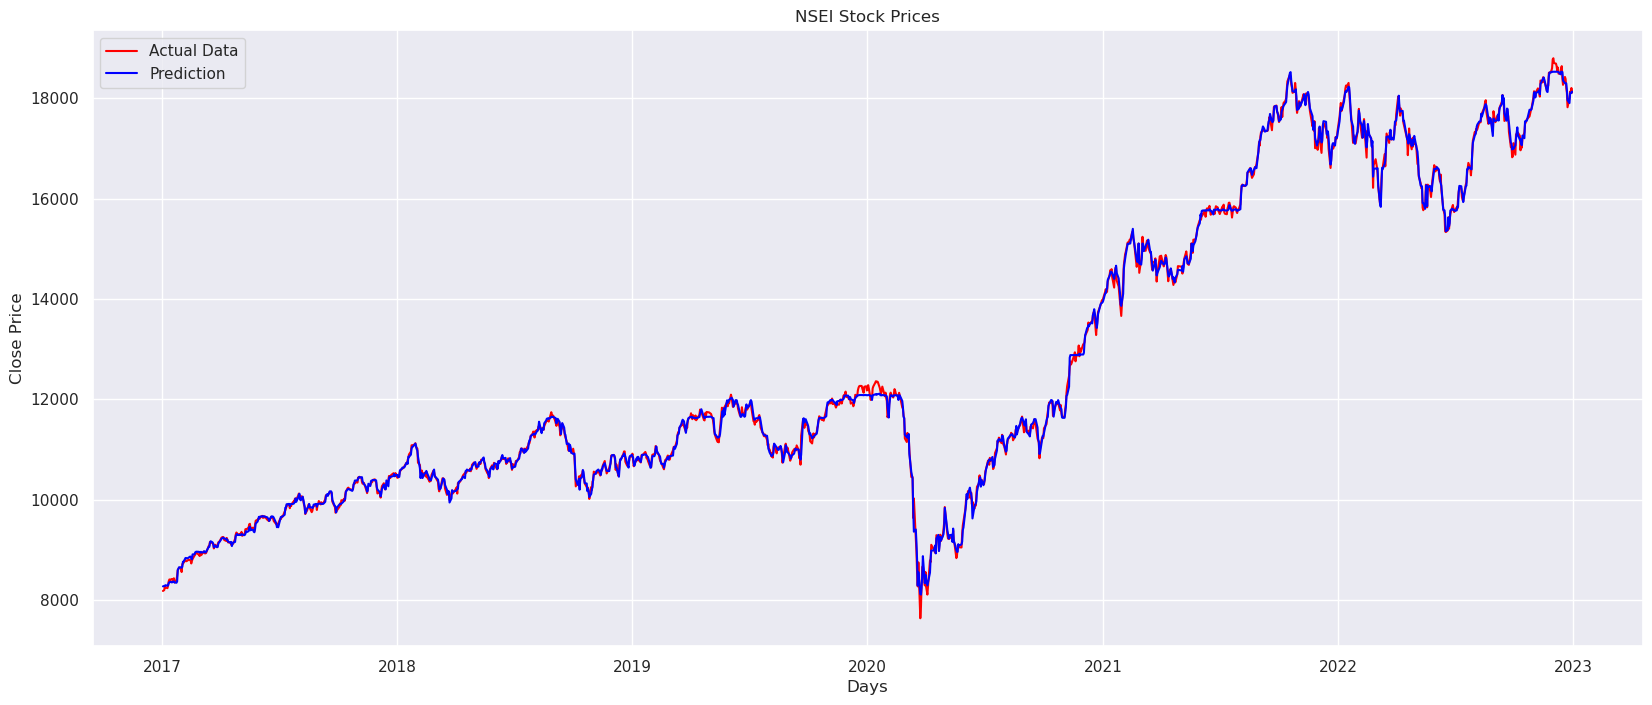

In [129]:
#plotting
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(df.index,df['close'], color = 'red', label="Actual Data")
plt.plot(df.index,y_pred, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()